<a href="https://colab.research.google.com/github/munjasriharsha/Stock_data/blob/main/market_forecasting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

the coefficient in normal method: -758504.2231631182
the intercept in normal method: 180476521.27692762
the coefficient is: [-758504.22316312]
the intercept is: 180476521.27692753
the mean square error in linear regression is: 1296135.2128971922


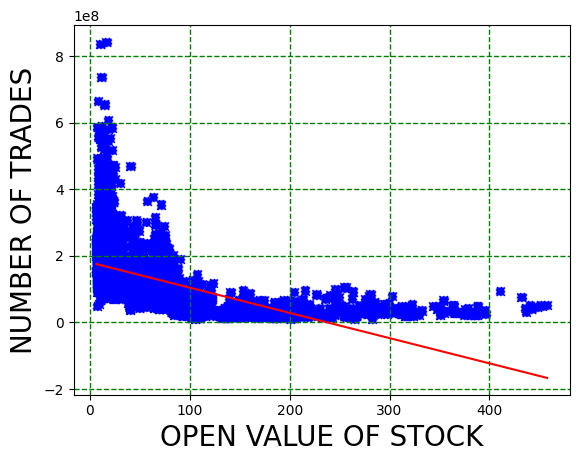

In [7]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn import linear_model
df=pd.read_csv("AAPL.csv")
x=df['Open'].values
y=df['Volume'].values
meanx=np.mean(x)
meany=np.mean(y)
nr=0
dr=0
n=len(x)
for i in range(n):
  nr+=(x[i]-meanx)*(y[i]-meany)
  dr+=(x[i]-meanx)**2
m=nr/dr
c=meany-(m*meanx)
print("the coefficient in normal method:",m)
print("the intercept in normal method:",c)
mse=0
for i in range(n):
  ypred=(m*x[i])+c
  mse+=(y[i]-ypred)**2
mse=np.sqrt(mse)
mse=mse/n
%matplotlib inline
plt.xlabel("OPEN VALUE OF STOCK",fontsize=20)
plt.ylabel("NUMBER OF TRADES",fontsize=20)
reg=linear_model.LinearRegression()
reg.fit(df[['Open']],df.Volume)
reg.coef_
print("the coefficient is:",reg.coef_)
reg.intercept_
print("the intercept is:",reg.intercept_)
print("the mean square error in linear regression is:",mse)
plt.scatter(df.Open,df.Volume,color='blue',marker='s',ls='dotted')
plt.plot(df.Open,reg.predict(df[['Open']]),color='red')
plt.grid(axis="both",ls="dashed",lw=1,c='g')

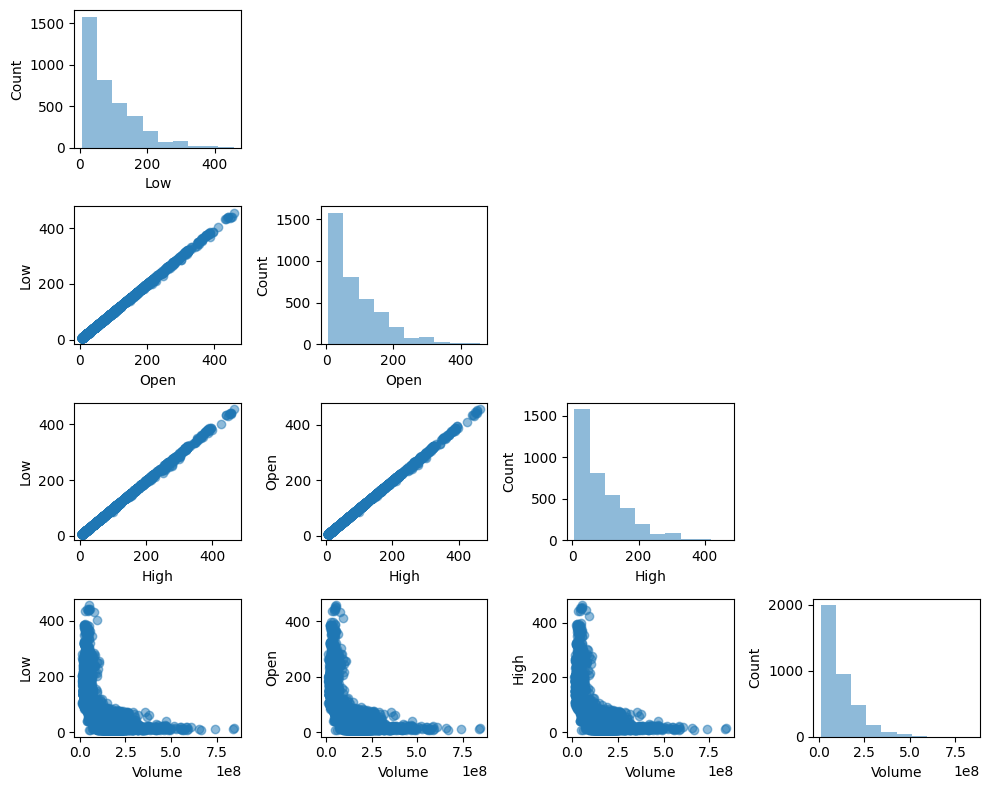

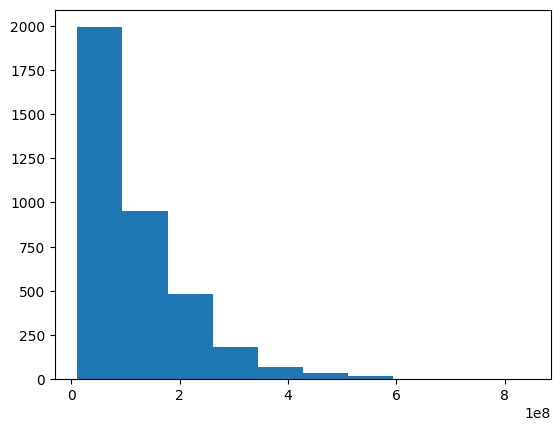

ValueError: ignored

In [8]:

#RIDGE REGRSSION CODE
from pandas.core.computation.parsing import clean_column_name
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from mlxtend.plotting import scatterplotmatrix
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
from sklearn.metrics import confusion_matrix
df=pd.read_csv("AAPL.csv")
df.isnull().sum().sum()
cols=['Low','Open','High','Volume']
scatterplotmatrix(df[cols].values,figsize=(10,8),names=cols,alpha=0.5)
plt.tight_layout()
plt.show()
plt.hist(df['Volume'])
plt.show()
X=df.iloc[0:3000,0:1]
y=df.iloc[0:3000,0:4]
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=10)
ridge=Ridge(alpha=1.0)
ridge.fit(X_train,y_train)
y_pred=ridge.predict(X_test)
print(y_pred)
print("the slope is: %.2f" % ridge.coef_[0])
mean_squared_error(y_test,y_pred)
print("mean square error in ridge is:",np.sqrt(mean_squared_error(y_test,y_pred)))
cm=confusion_matrix(y_test,y_pred)
print("confusion matrix:",cm)
sns.heatmap(cm,annot=True)
plt.show()

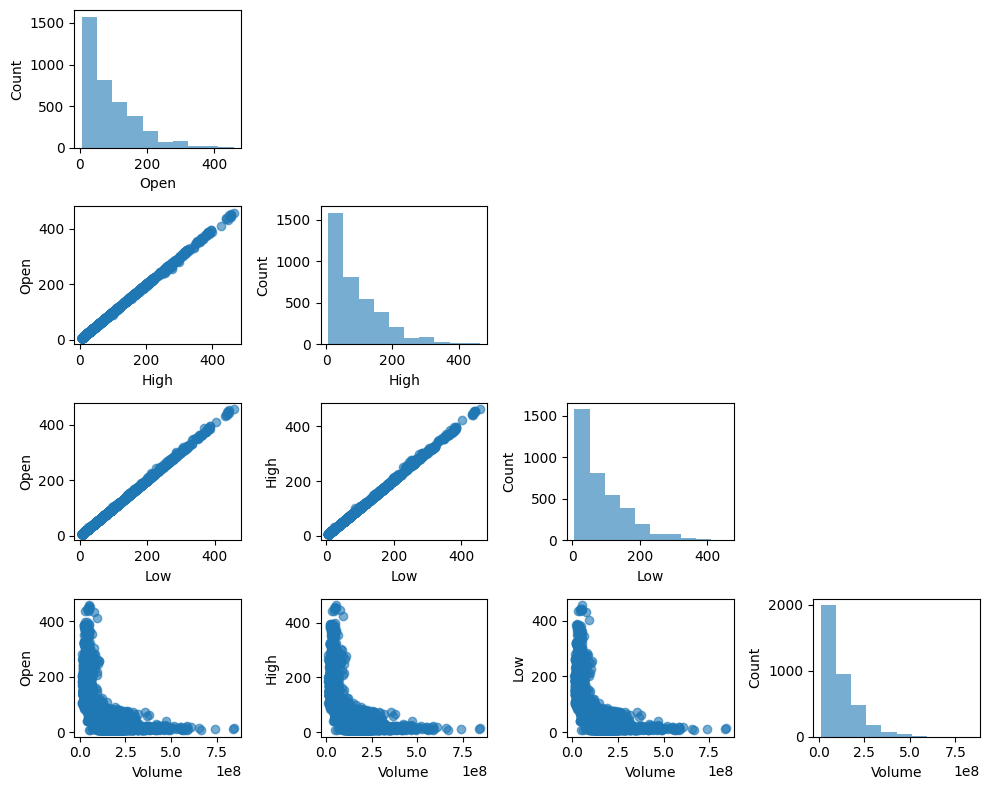

ValueError: ignored

In [9]:
#lasso regression
from pandas.core.computation.parsing import clean_column_name
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from mlxtend.plotting import scatterplotmatrix
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error
#from mlxtend.plotting import heatmap
df=pd.read_csv("AAPL.csv")
df.isnull().sum().sum()
cols=['Open','High','Low','Volume']
scatterplotmatrix(df[cols].values,figsize=(10,8),names=cols,alpha=0.6)
plt.tight_layout()
plt.show()
#cm=np.corrcoef(df[cols].values.T)
#hm=heatmap(cm,row_names=cols,column_name=cols)
#plt.show()
X=df.iloc[0:3000,0:1]
y=df.iloc[0:3000,0:4]
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=0)
lasso=Lasso(alpha=1.0)
lasso.fit(X_train,y_train)
y_pred=lasso.predict(X_test)
print(y_pred)
print("the slope is %.3f"% lasso.coef_[0])
mean_squared_error(y_test,y_pred)
print("mean square error in lasso is:",np.sqrt(mean_squared_error(y_test,y_pred)))